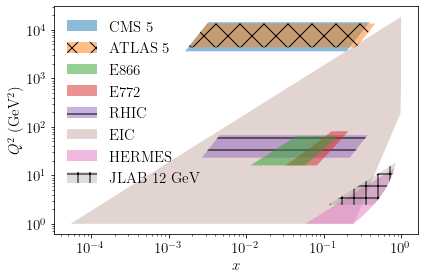

In [35]:
import pandas as pd
import numpy as np
import os
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib.patches as patches
import matplotlib
sizeOfFont = 20
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
#ticks_font = matplotlib.font_manager.FontProperties(family='Helvetica', style='normal',size=sizeOfFont, weight='normal', stretch='normal')

dftot = pd.DataFrame(columns=["Nu","Z","Q2","pt2","MULT-RATIO","STAT","SYS","fuu","fuua","DIS"])

def xyQS(y,Q2,rts):
    return np.sqrt(Q2)/rts*np.exp(-y)

def xxFQ(xF,Q2,rts):
    return (-xF+np.sqrt(xF**2.+4.*Q2/rts/rts))/2.

def xQ2W2(W2,Q2):
    MN = 0.938
    return Q2/(Q2+W2-MN**2.)

def xyQSSIDIS(Q2,y,rts):
    return Q2/y/rts/rts

#CMS 5
rtsSCMS5 = 5020.
yminCMS5 = -2.8
ymaxCMS5 =  2.0
QminCMS5 =  60.
QmaxCMS5 = 120.

#ATLAS 5
rtsSATL5 = 5020.
yminATL5 = -3.0
ymaxATL5 =  2.0
QminATL5 =  66.
QmaxATL5 = 116.

#RHIC
rtsSRHIC = 200.
yminRHIC = -2.2
ymaxRHIC =  2.2
QminRHIC =  4.8
QmaxRHIC =  8.2

#E772
rtsE772 = np.sqrt(2.*800*0.938)
xFminE772 = 0.05
xFmaxE772 = 0.30
QminE772 = 4.0
QmaxE772 = 9.0

#E866
rtsE866 = np.sqrt(2.*800*0.938)
xFminE866 = 0.13
xFmaxE866 = 0.93
QminE866 = 4.0
QmaxE866 = 8.0

#HERMES
rtsHERM = np.sqrt(2.*27.6*0.938)
QminHERM = 1.
ymaxHERM = 0.85
W2HERM = 4.
Mproton = 0.938
QmaxHERM = np.sqrt(Mproton*Mproton-W2HERM+rtsHERM*rtsHERM*ymaxHERM)

#EIC
rtsEIC = 140.
QminEIC = 1.
ymaxEIC = 0.95
W2EIC = 4.
QmaxEIC = np.sqrt(Mproton*Mproton-W2EIC+rtsEIC*rtsEIC*ymaxEIC)

#JLAB
rtsJLAB = np.sqrt(2.*0.938*12.)
QminJLAB = np.sqrt(2.47)
ymaxJLAB = 0.95
W2JLAB = 4.
QmaxJLAB = np.sqrt(Mproton*Mproton-W2JLAB+rtsJLAB*rtsJLAB*ymaxJLAB)

#Generate the plot
ax = py.subplot(111)

#CMS
Q2vals = np.linspace(QminCMS5*QminCMS5,QmaxCMS5*QmaxCMS5,100,endpoint = True)
xLeft = [xyQS(yminCMS5,Q2,rtsSCMS5) for Q2 in Q2vals]
xRight= [xyQS(ymaxCMS5,Q2,rtsSCMS5) for Q2 in Q2vals]
ax.fill_betweenx(Q2vals,xLeft,xRight,alpha = 0.5,label = r"\rm CMS 5")

#ATLAS
Q2vals = np.linspace(QminATL5*QminATL5,QmaxATL5*QmaxATL5,100,endpoint = True)
xLeft = [xyQS(yminATL5,Q2,rtsSATL5) for Q2 in Q2vals]
xRight= [xyQS(ymaxATL5,Q2,rtsSATL5) for Q2 in Q2vals]
ax.fill_betweenx(Q2vals,xLeft,xRight,alpha = 0.5,label = r"\rm ATLAS 5",hatch="X")

#E866
Q2vals = np.linspace(QminE866*QminE866,QmaxE866*QmaxE866,100,endpoint = True)
xLeft = [xxFQ(xFmaxE866,Q2,rtsE866) for Q2 in Q2vals]
xRight= [xxFQ(xFminE866,Q2,rtsE866) for Q2 in Q2vals]
ax.fill_betweenx(Q2vals,xLeft,xRight,alpha = 0.5,label = r"\rm E866",zorder = 4)

#E772
Q2vals = np.linspace(QminE772*QminE772,QmaxE772*QmaxE772,100,endpoint = True)
xLeft = [xxFQ(xFmaxE772,Q2,rtsE772) for Q2 in Q2vals]
xRight= [xxFQ(xFminE772,Q2,rtsE772) for Q2 in Q2vals]
ax.fill_betweenx(Q2vals,xLeft,xRight,alpha = 0.5,label = r"\rm E772",zorder = 3)

#RHIC
Q2vals = np.linspace(QminRHIC*QminRHIC,QmaxRHIC*QmaxRHIC,100,endpoint = True)
xLeft = [xyQS(yminRHIC,Q2,rtsSRHIC) for Q2 in Q2vals]
xRight= [xyQS(ymaxRHIC,Q2,rtsSRHIC) for Q2 in Q2vals]
ax.fill_betweenx(Q2vals,xLeft,xRight,alpha = 0.5,label = r"\rm RHIC",hatch="-",zorder = 2)

#EIC
Q2vals = np.linspace(QminEIC*QminEIC,QmaxEIC*QmaxEIC,100,endpoint = True)
xLeft  = [xyQSSIDIS(Q2,ymaxEIC,rtsEIC) for Q2 in Q2vals]
xRight = [xQ2W2(W2EIC,Q2) for Q2 in Q2vals]
ax.fill_betweenx(Q2vals,xLeft,xRight,alpha = 0.25,label = r"\rm EIC",zorder = 1)

#HERMES
Q2vals = np.linspace(QminHERM*QminHERM,QmaxHERM*QmaxHERM,100,endpoint = True)
xLeft  = [xyQSSIDIS(Q2,ymaxHERM,rtsHERM) for Q2 in Q2vals]
xRight = [xQ2W2(W2HERM,Q2) for Q2 in Q2vals]
ax.fill_betweenx(Q2vals,xLeft,xRight,alpha = 0.5,label = r"\rm HERMES",zorder = 3)

#JLAB
Q2vals = np.linspace(QminJLAB*QminJLAB,QmaxJLAB*QmaxJLAB,100,endpoint = True)
xLeft  = [xyQSSIDIS(Q2,ymaxJLAB,rtsJLAB) for Q2 in Q2vals]
xRight = [xQ2W2(W2JLAB,Q2) for Q2 in Q2vals]
ax.fill_betweenx(Q2vals,xLeft,xRight,alpha = 0.25,label = r"\rm JLAB 12 GeV",hatch="+",zorder = 4)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(loc = 2,frameon = False,fontsize = 15)

ax.semilogy()
ax.semilogx()

ax.set_xlabel(r"\rm $x$",fontsize = 15)
ax.set_ylabel(r"\rm $Q^2$ (GeV$^2$)",fontsize = 15)

py.tight_layout()

py.savefig("xs.pdf")



In [41]:
dftot = pd.DataFrame(columns=["Nu","Z","Q2","pt2","MULT-RATIO","STAT","SYS","fuu","fuua","DIS"])

for file in os.listdir("./HERMES_DIS/"):
    if "z.dat" in file:
        df = pd.read_csv("HERMES_DIS/"+file, delim_whitespace=True)
        df = df[df.Z<0.7]
        df = df[df.pt2<0.3]
        dftot = pd.concat([dftot,df])

In [42]:
rtsHERM = np.sqrt(2.*27.6*0.938)
nuhermx = max(dftot.Nu.tolist())
nuhermn = min(dftot.Nu.tolist())

Q2hermx = max(dftot.Q2.tolist())
Q2hermn = min(dftot.Q2.tolist())

Qhermx = np.sqrt(Q2hermx)
Qhermn = np.sqrt(Q2hermn)

xminherm = Q2hermn/2./0.938/nuhermx
xmaxherm = Q2hermx/2./0.938/nuhermn

In [44]:
Qhermx, Qhermn

(1.6431676725154984, 1.5394804318340654)

In [38]:
yminherm = Q2hermn/2./xmaxherm/(rtsHERM**2)

In [39]:
ymaxherm = Q2hermx/2./xminherm/(rtsHERM**2)

In [40]:
print(yminherm,ymaxherm)

0.20990338164251202 0.40843423225096304


In [22]:
Q2hermn

2.49

In [23]:
Q2hermx

2.75

In [24]:
xmaxherm

0.1143435929334828

In [25]:
xminherm

0.08015048978708941

In [29]:
Q2hermn/2./xmaxherm/(rtsHERM**2)

0.21028853754940713

In [28]:
Q2hermx/2./xminherm/(rtsHERM**2)

0.3313253012048192